#This is the main ipynb notebook
based on the py files in /../src_class

# Notes to myself:


# Imports
from `__init__.py`

In [1]:
from google.colab import files, drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import os
import sys

parent_dir = "/content/drive/MyDrive/TTMU_Colab_Notebooks/Calibrations/src_class"
sys.path.append(parent_dir)

import utils
import Cell_Class
import TDL_Class
import UniqueHistory_Class
import read_and_print
import initialize
import ITI


## Reloads

In [ ]:
# Reload modules
importlib.reload(utils)
importlib.reload(Cell_Class)
importlib.reload(TDL_Class)
importlib.reload(UniqueHistory_Class)
importlib.reload(read_and_print)
importlib.reload(initialize)
importlib.reload(ITI)

# # Re-import all functions explicitly
# from utils import *
# from Cell_Class import *
# from TDL_Class import *

# from UniqueHistory_Class import *
# from read_and_print import *
# from initialize import *


<module 'initialize' from '/content/drive/MyDrive/TTMU_Colab_Notebooks/Calibrations/src_class/initialize.py'>

# POR 0 - Initialize the TDL slices

In [3]:
TDL3_Z3_3 = TDL_Class.TDL()
TDL3_Z3_3.initialize_TDL(6400,8000,3)

[6416 6417 6418 6419 6420 6421 6422 6423 6440 6441 6442 6443 6444 6445
 6446 6447 6464 6465 6466 6467 6468 6469 6470 6471 6488 6489 6490 6491
 6492 6493 6494 6495 6512 6513 6514 6515 6516 6517 6518 6519 6536 6537
 6538 6539 6540 6541 6542 6543 6560 6561 6562 6563 6564 6565 6566 6567
 6584 6585 6586 6587 6588 6589 6590 6591 6608 6609 6610 6611 6612 6613
 6614 6615 6632 6633 6634 6635 6636 6637 6638 6639 6656 6657 6658 6659
 6660 6661 6662 6663 6680 6681 6682 6683 6684 6685 6686 6687 6704 6705
 6706 6707 6708 6709 6710 6711 6728 6729 6730 6731 6732 6733 6734 6735
 6752 6753 6754 6755 6756 6757 6758 6759 6776 6777 6778 6779 6780 6781
 6782 6783 6800 6801 6802 6803 6804 6805 6806 6807 6824 6825 6826 6827
 6828 6829 6830 6831 6848 6849 6850 6851 6852 6853 6854 6855 6872 6873
 6874 6875 6876 6877 6878 6879 6896 6897 6898 6899 6900 6901 6902 6903
 6920 6921 6922 6923 6924 6925 6926 6927 6944 6945 6946 6947 6948 6949
 6950 6951 6968 6969 6970 6971 6972 6973 6974 6975 6992 6993 6994 6995
 6996 

#POR 1

In [ ]:
!test -f "/content/drive/My Drive/TTMU_SaveData/250424/Unsync1_Ch3_Z3_3_POR1.csv" && echo "File exists" || echo "File not found"

File exists


## 1) Data Loading


Data loaded from the csv file: /content/drive/My Drive/TTMU_SaveData/250424/Unsync1_Ch3_Z3_3_POR1.csv'.

There are 205 tapped bins and 188 untapped = 393 = 393

Tapped is: 52.16% 



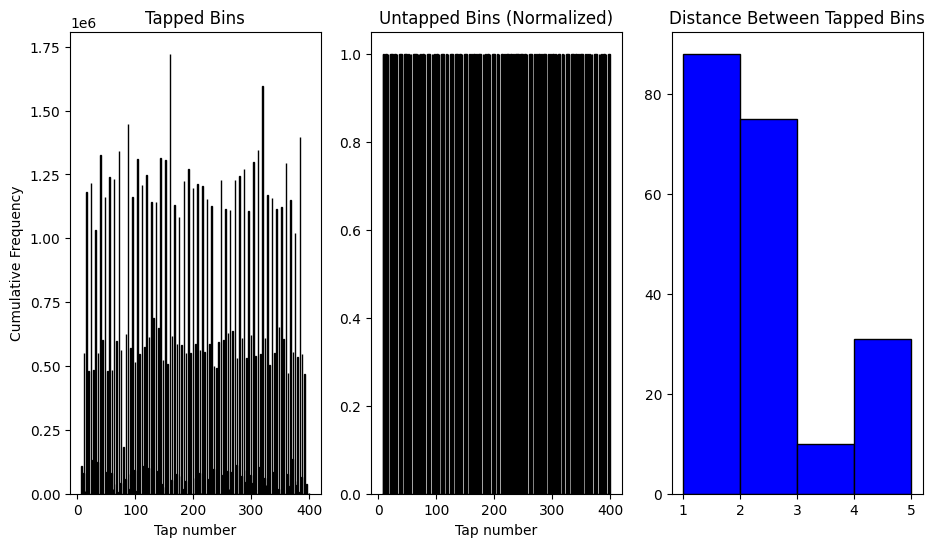

In [4]:
# Load the data
file_path = "/content/drive/My Drive/TTMU_SaveData/250424/Unsync1_Ch3_Z3_3_POR1.csv"
data, file_path = read_and_print.load_csv(file_path)
print(f"\nData loaded from the csv file: {file_path}'.\n")

# Identify the tapped / untapped bins
full_range, present_taps1, missing_taps = read_and_print.identify_sets(data)
print(f"There are {len(present_taps1)} tapped bins and {len(missing_taps)} untapped"
    f" = {len(present_taps1)+len(missing_taps)} = {len(full_range)}\n")
print(f"Tapped is: {100 * len(present_taps1) / len(full_range):.2f}% \n")

# Print Taps
bin1, freq1 = read_and_print.print_taps(data, present_taps1, missing_taps)

## 2) Carry out the POR & error lib construction

In [5]:
""" Present bins """

# Check raw 'present_taps'
print(f"Present taps: \n {present_taps1} \n")


# Feed to the TDL
TDL3_Z3_3.feed_physical_nums(present_taps1, 1, verbose = True)


# POR
TDL3_Z3_3.perform_POR()
to_print1 = TDL3_Z3_3.get_logical_assignments()
error_lib1 = TDL3_Z3_3.build_initial_error_lib()


Present taps: 
 [  7  10  11  13  15  17  18  19  23  25  26  27  31  33  34  35  37  39
  41  42  43  47  49  50  51  53  55  57  58  59  61  63  66  67  69  71
  73  74  75  79  81  82  83  85  87  89  90  91  93  95  97  98  99 101
 103 105 106 107 111 113 114 115 119 121 122 123 127 129 130 131 135 137
 138 139 143 145 146 147 149 151 153 154 155 159 161 162 163 167 170 171
 173 175 177 178 179 181 183 185 186 187 191 193 194 195 199 201 202 203
 207 209 210 211 213 215 218 219 223 225 226 227 231 234 235 239 242 243
 247 249 250 251 255 257 258 259 261 263 265 266 267 271 273 274 275 279
 282 283 287 289 290 291 295 297 298 299 301 303 306 307 309 311 313 314
 315 319 321 322 323 325 327 329 330 331 335 337 338 339 343 346 347 351
 353 354 355 359 362 363 365 367 369 370 371 375 377 378 379 381 383 385
 386 387 391 393 394 395 399] 

Trial 0 data processed and added to unique history. 


----------------------------------------------------------------------------------------------

##3) Results

In [6]:
# Show Results

print("POR result: \n")
for i,j in TDL3_Z3_3.POR_result.items():
  print(f"{i}:{j}")

print("\nLogical bin assignment: \n")
print(f"{TDL3_Z3_3.logical_assignment}")
print(f"{to_print1}")

POR result: 

((np.int64(8),),):[8]
((np.int64(3), np.int64(4), np.int64(6), np.int64(8)),):[2, 3, 1, 8, np.int64(4), 6, 5, 7]
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)),):[2, 1, np.int64(3), 8, 4, 6, 7, 5]
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)),):[2, 1, np.int64(3), 8, 4, 6, 5, 7]
((np.int64(3), np.int64(4), np.int64(8)),):[2, 3, 1, 8, np.int64(4), 6, 7, 5]

Logical bin assignment: 

{0: np.int64(6416), 1: np.int64(6417), 2: np.int64(6418), 3: np.int64(6419), 4: np.int64(6420), 5: np.int64(6421), 6: np.int64(6422), 7: np.int64(6423), 8: np.int64(6440), 9: np.int64(6441), 10: np.int64(6442), 11: np.int64(6443), 12: np.int64(6444), 13: np.int64(6445), 14: np.int64(6446), 15: np.int64(6447), 16: np.int64(6464), 17: np.int64(6465), 18: np.int64(6466), 19: np.int64(6467), 20: np.int64(6468), 21: np.int64(6469), 22: np.int64(6470), 23: np.int64(6471), 24: np.int64(6488), 25: np.int64(6489), 26: np.int64(6490), 27: np.int64(6491), 28: np.int64(6492), 29

#POR 2

In [ ]:
!test -f "/content/drive/My Drive/TTMU_SaveData/250425/Unsync1_Ch3_Z3_3_POR2.csv" && echo "File exists" || echo "File not found"

File exists


## 1) Data Loading


Data loaded from the csv file: /content/drive/My Drive/TTMU_SaveData/250425/Unsync1_Ch3_Z3_3_POR2.csv'.

There are 360 tapped bins and 32 untapped = 392 = 392

Tapped is: 91.84% 



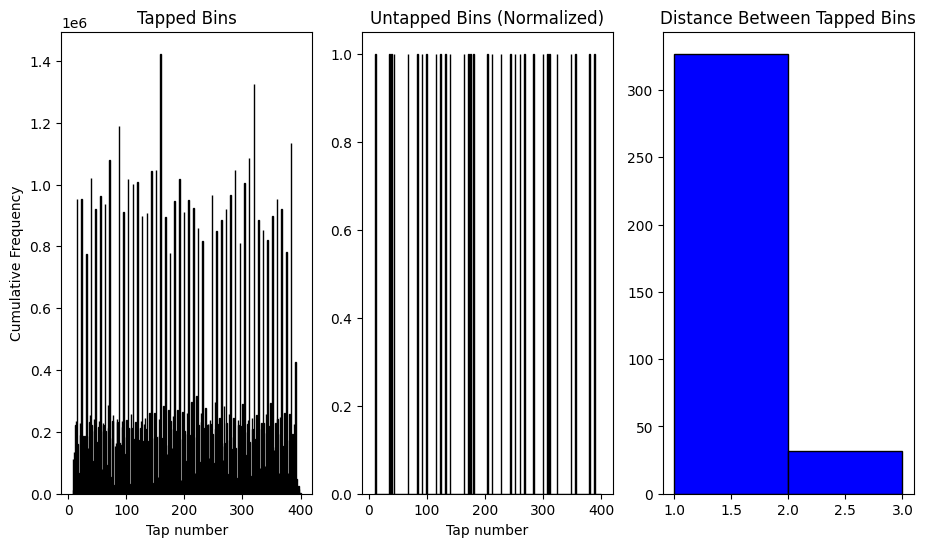

In [7]:
# Load the data
file_path = "/content/drive/My Drive/TTMU_SaveData/250425/Unsync1_Ch3_Z3_3_POR2.csv"
data, file_path = read_and_print.load_csv(file_path)
print(f"\nData loaded from the csv file: {file_path}'.\n")

# Identify the tapped / untapped bins
full_range, present_taps2, missing_taps = read_and_print.identify_sets(data)
print(f"There are {len(present_taps2)} tapped bins and {len(missing_taps)} untapped"
    f" = {len(present_taps2)+len(missing_taps)} = {len(full_range)}\n")
print(f"Tapped is: {100 * len(present_taps2) / len(full_range):.2f}% \n")

# Print Taps
bin2, freq2 = read_and_print.print_taps(data, present_taps2, missing_taps)

## 2) Carry out 'next_POR_n_error_lib'

In [8]:
""" Present bins """

# Check raw 'present_taps'
print(f"Present taps: \n {present_taps2} \n")


# Feed to the TDL
TDL3_Z3_3.feed_physical_nums(present_taps2, 2)


# POR
error_lib2 = TDL3_Z3_3.next_POR_n_error_lib(error_lib1, 2)
to_print2 = TDL3_Z3_3.get_logical_assignments()

Present taps: 
 [  8   9  10  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26
  27  28  29  30  31  32  33  34  36  37  39  40  41  42  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  84  85
  86  87  88  89  90  92  93  94  95  96  97  98 100 101 102 103 104 105
 106 107 108 109 110 111 112 113 114 116 117 118 119 120 121 122 124 125
 126 127 128 129 130 132 133 134 135 136 137 138 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 164
 165 166 167 168 169 170 172 173 175 176 177 178 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 204
 205 206 207 208 209 210 212 213 214 215 216 217 218 219 220 221 222 223
 224 225 226 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242
 244 245 246 247 248 249 250 252 253 254 255 256 257 258 260 261 262 263
 264 265 266 268 269 270 271 272 27

##3) Results

In [9]:
# Show Results

print("POR result: \n")
for i,j in TDL3_Z3_3.POR_result.items():
  print(f"{i}:{j}")

print("\nLogical bin assignment: \n")
print(f"{TDL3_Z3_3.logical_assignment}")
print(f"{to_print2}")

POR result: 

((np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 3, 1, np.int64(4), 8, 6, 5, 7)
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 8, 4, 6, 7, 5)
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 4, 8, 6, 7, 5)
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 8, 4, 6, 5, 7)
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 4, 8, 6, 5, 7)
((np.int64(3), np.i

# POR3

In [ ]:
!test -f "/content/drive/My Drive/TTMU_SaveData/250425/Unsync1_Ch3_Z3_3_POR3.csv" && echo "File exists" || echo "File not found"

File exists


## 1) Data Loading


Data loaded from the csv file: /content/drive/My Drive/TTMU_SaveData/250425/Unsync1_Ch3_Z3_3_POR3.csv'.

There are 384 tapped bins and 6 untapped = 390 = 390

Tapped is: 98.46% 



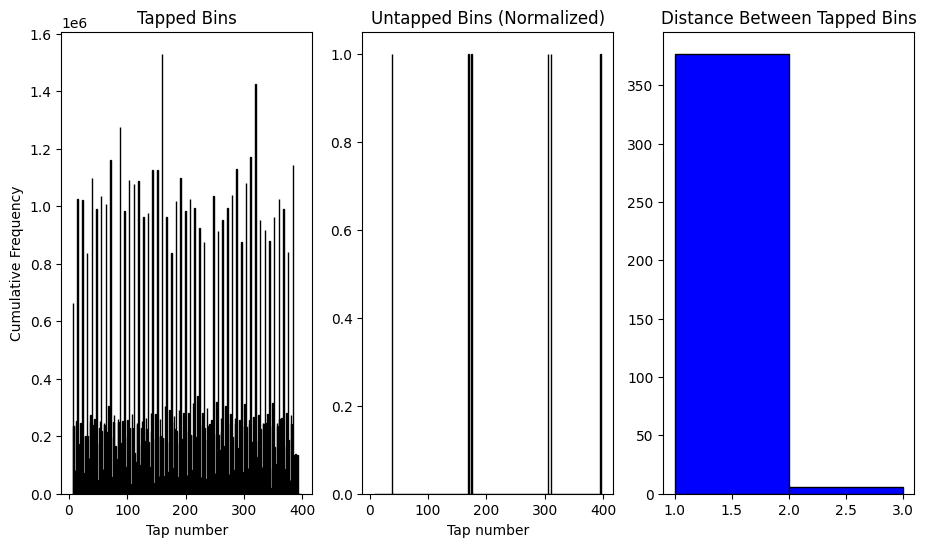

In [10]:
# Load the data
file_path = "/content/drive/My Drive/TTMU_SaveData/250425/Unsync1_Ch3_Z3_3_POR3.csv"
data, file_path = read_and_print.load_csv(file_path)
print(f"\nData loaded from the csv file: {file_path}'.\n")

# Identify the tapped / untapped bins
full_range, present_taps3, missing_taps = read_and_print.identify_sets(data)
print(f"There are {len(present_taps3)} tapped bins and {len(missing_taps)} untapped"
    f" = {len(present_taps3)+len(missing_taps)} = {len(full_range)}\n")
print(f"Tapped is: {100 * len(present_taps3) / len(full_range):.2f}% \n")

# Print Taps
bin3, freq3 = read_and_print.print_taps(data, present_taps3, missing_taps)

## 2) Carry out 'next_POR_n_error_lib'

In [ ]:
""" Present bins """

# Check raw 'present_taps'
print(f"Present taps: \n {present_taps3} \n")


# Feed to the TDL
TDL2_Z3_2.feed_physical_nums(present_taps3, 3)


# POR
error_lib3 = TDL2_Z3_2.next_POR_n_error_lib(error_lib2, 3)
to_print3 = TDL2_Z3_2.get_logical_assignments()

Present taps: 
 [ 15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32
  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 151 152 153 154 155 156 157 158 159
 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 25

KeyError: ((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(8)))

##3) Results

In [ ]:
# Show Results

print("POR result: \n")
for i,j in TDL1_Z3_1.POR_result.items():
  print(f"{i}:{j}")

print("\nLogical bin assignment: \n")
print(f"{TDL1_Z3_1.logical_assignment}")
print(f"{to_print3}")

POR result: 

((np.int64(8),), (np.int64(8),), (np.int64(8),)):(8,)
((np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 3, 1, 8, np.int64(4), 6, 7, 5)
((np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 3, 1, np.int64(4), 8, 6, 7, 5)
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 4, 8, 6, 5, 7)
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)), (np.int64(

# Code Density Test

In [11]:
cdc_width, cdc_to_pass = ITI.get_bin_widths(bin3, freq3, to_print2)

# Save this into a .npz file
np.savez("/content/drive/MyDrive/TTMU_Colab_Notebooks/Calibrations/data/TDL3_Z3_3.npz", cdc_to_pass = cdc_to_pass)

In [12]:
print(cdc_to_pass)

{np.int64(6441): np.float64(29.754174071667393), np.int64(6442): np.float64(10.513446303960173), np.int64(6440): np.float64(0.5385074754779411), np.int64(6443): np.float64(3.6914700891011583), np.int64(6447): np.float64(2.886622392273964), np.int64(6445): np.float64(10.644240778193952), np.int64(6444): np.float64(11.299244085931521), np.int64(6446): np.float64(0.5243433034910067), np.int64(6465): np.float64(45.931854823870985), np.int64(6464): np.float64(7.739151174342086), np.int64(6466): np.float64(3.294918096796069), np.int64(6471): np.float64(0.3201730395654181), np.int64(6467): np.float64(3.1695472453800706), np.int64(6469): np.float64(11.027390595106342), np.int64(6470): np.float64(9.18891692986552), np.int64(6468): np.float64(1.5056156235478642), np.int64(6489): np.float64(45.85543104780224), np.int64(6488): np.float64(9.055657172532747), np.int64(6490): np.float64(0.051905415066044264), np.int64(6495): np.float64(2.7810634523080453), np.int64(6491): np.float64(3.211457058062930

In [13]:
print(to_print2)

{0: np.int64(6416), 1: np.int64(6417), 2: np.int64(6418), 3: np.int64(6419), 4: np.int64(6420), 5: np.int64(6421), 6: np.int64(6422), 7: np.int64(6423), 8: np.int64(6441), 9: np.int64(6442), 10: np.int64(6440), 11: np.int64(6443), 12: np.int64(6447), 13: np.int64(6445), 14: np.int64(6444), 15: np.int64(6446), 16: np.int64(6465), 17: np.int64(6464), 18: np.int64(6466), 19: np.int64(6471), 20: np.int64(6467), 21: np.int64(6469), 22: np.int64(6470), 23: np.int64(6468), 24: np.int64(6489), 25: np.int64(6488), 26: np.int64(6490), 27: np.int64(6495), 28: np.int64(6491), 29: np.int64(6493), 30: np.int64(6494), 31: np.int64(6492), 32: np.int64(6513), 33: np.int64(6512), 34: np.int64(6514), 35: np.int64(6515), 36: np.int64(6519), 37: np.int64(6517), 38: np.int64(6516), 39: np.int64(6518), 40: np.int64(6537), 41: np.int64(6536), 42: np.int64(6538), 43: np.int64(6539), 44: np.int64(6543), 45: np.int64(6541), 46: np.int64(6542), 47: np.int64(6540), 48: np.int64(6561), 49: np.int64(6560), 50: np.in

In [14]:
print(bin3)
print(present_taps3)
print(freq3)

[  7.   8.   9.  10.  11.  12.  13.  14.  15.  16.  17.  18.  19.  20.
  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.  31.  32.  33.  34.
  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.  46.  47.  48.
  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.  59.  60.  61.  62.
  63.  64.  65.  66.  67.  68.  69.  70.  71.  72.  73.  74.  75.  76.
  77.  78.  79.  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.  90.
  91.  92.  93.  94.  95.  96.  97.  98.  99. 100. 101. 102. 103. 104.
 105. 106. 107. 108. 109. 110. 111. 112. 113. 114. 115. 116. 117. 118.
 119. 120. 121. 122. 123. 124. 125. 126. 127. 128. 129. 130. 131. 132.
 133. 134. 135. 136. 137. 138. 139. 140. 141. 142. 143. 144. 145. 146.
 147. 148. 149. 150. 151. 152. 153. 154. 155. 156. 157. 158. 159. 160.
 161. 162. 163. 164. 165. 166. 167. 168. 169. 170. 171. 172. 173. 174.
 175. 176. 177. 178. 179. 180. 181. 182. 183. 184. 185. 186. 187. 188.
 189. 190. 191. 192. 193. 194. 195. 196. 197. 198. 199. 200. 201. 202.
 203. 

# Endpoint - to print out

In [ ]:
read_and_print.vivado_print_bin_assignment(to_print2, 3)

Type the ID for this txt file (e.g. '25_02_14'): 25_04_25_POR3
The text file has been created in this directory under the name: Bin_sequence_25_04_25_POR3.txt.


In [ ]:
files.download("Bin_sequence_25_04_25_POR3.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
final_outcome_of_notebook = to_print2

In [ ]:
read_and_print.vivado_print_bin_assignment(to_print3, 1)

# Debug Prison

In [ ]:
r1,s,e = utils.split_into_cells(present_taps1, logical_assignment = TDL3_Z3_3.logical_assignment, TDL_start = TDL3_Z3_3.TDL_start)
print(f"Starting Cell num: {s}, Ending Cell num: {e}")

for i,j in r1.items():
  print(f"{i}:{j}")

Starting Cell num: 3, Ending Cell num: 150
3:[np.int64(8)]
6:[np.int64(3), np.int64(4), np.int64(6), np.int64(8)]
9:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
12:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
15:[np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)]
18:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
21:[np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)]
24:[np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)]
27:[np.int64(3), np.int64(4), np.int64(6), np.int64(8)]
30:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
33:[np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)]
36:[np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)]
39:[np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)]
42:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
45:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
48:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
51:[np.int64(2), np.int64

In [ ]:
r2,s,e = utils.split_into_cells(present_taps2, logical_assignment = TDL3_Z3_3.logical_assignment, TDL_start = TDL3_Z3_3.TDL_start)
print(f"Starting Cell num: {s}. Ending Cell num {e}")

for i,j in r2.items():
  print(f"{i}:{j}")

Starting Cell num: 6. Ending Cell num 150
6:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
9:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
12:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
15:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(8)]
18:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
21:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
24:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
27:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
30:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
33:[np.int64(1), np.int64(2), np.int64(3), np.int64(5

In [ ]:
r3,s,e = utils.split_into_cells(present_taps3, logical_assignment = TDL3_Z3_3.logical_assignment, TDL_start = TDL3_Z3_3.TDL_start)
print(f"Starting Cell num: {s}, Ending Cell num: {e}")

for i,j in r3.items():
  print(f"{i}:{j}")

Starting Cell num: 3, Ending Cell num: 150
3:[np.int64(8)]
6:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
9:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
12:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
15:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(8)]
18:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
21:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
24:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
27:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
30:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7

In [ ]:
code_density_test = freq3 / np.sum(freq3) * 4000  # in units of ps
for i in code_density_test:
  print(i)

0.0058588900736735346
1.846920597498587
0.0
10.07781066696695
10.042326582730427
1.2302251681309502
47.840388903673265
8.220826008293423
0.5044315356978923
4.9226961388367005
0.9643071573677674
11.406077745604938
10.806297498869359
1.1933708596030037
43.47598828992145
6.159630681084277
3.0314086237640856
3.326999077803615
1.53011529149874
13.866906074774816
9.414244117009925
0.0684639654576851
43.758018248387245
9.621100735901399
0.7119968912918266
3.66431049906132
1.611431015827709
11.602775805094478
10.585266145928674
2.036484040850024
42.85801713448939
9.234130496357961
1.4990726239309695
2.2284099398763297
0.10026261884141323
13.894452307943782
10.89096791025664
0.9916643940827432
43.0337838366996
9.964649040140756
0.7713890269580171
4.2753832839227695
1.638599256088695
13.625557603030265
9.414669359031402
3.2853726088124344
43.64126568893525
10.715059460705943
1.9451515044596135
3.991888602938566
1.801608697654612
10.53848952356628
10.436147943730983
0.8676354711521541
48.54784988

In [ ]:
len(np.where(code_density_test < 0.5)[0]) # Get rid of these ones; these post processing can be done later during ITI.

38

# Reload (same thing)

In [ ]:
# Reload modules
importlib.reload(utils)
importlib.reload(Cell_Class)
importlib.reload(TDL_Class)
importlib.reload(UniqueHistory_Class)
importlib.reload(read_and_print)
importlib.reload(initialize)

# # Re-import all functions explicitly
# from utils import *
# from Cell_Class import *
# from TDL_Class import *
# from UniqueHistory_Class import *
# from read_and_print import *
# from initialize import *


<module 'initialize' from '/content/drive/MyDrive/TTMU_Colab_Notebooks/Calibrations/src_class/initialize.py'>